In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist, cifar10
from keras.layers import Dense, Flatten, Normalization, Dropout, Conv2D, MaxPooling2D, RandomFlip, RandomRotation, RandomZoom, BatchNormalization, Activation
from keras.models import Sequential
from keras.losses import SparseCategoricalCrossentropy, CategoricalCrossentropy
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import utils

import matplotlib as mpl
import matplotlib.pyplot as plt

# Neural Networks and Images

Images are perhaps the place where neural networks have had the most dramatic impact. The best neural networks can very accurately perform image recognition, to the point that they can identify disease in medical imaging better than doctors, or track people's faces (or even their gait) in real time video. 

## Image Data

Until now we've used simple images that only have one color, we can expand this a bit now to handle more "normal" images. We will use one of the sample ones from Keras called cifar10. 

### Color Images

Color images have a greater depth - one layer for each color. Usually this is one for red, blue, and green, or RGB. There are other color encodings, but the idea is pretty similar. Of note for us, these images are now 3 dimensional - in terms of their representation as an array. 

![RGB](images/rgb.png "RGB" )

In [2]:
# Load data
# Note: the class names are taken from the documentation
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


170508288/170498071 [==============================] - 7s 0us/step


### Visualizing

We can use imshow to display one image. 

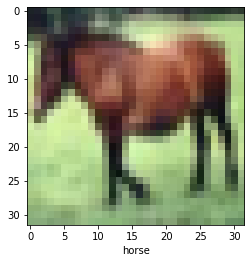

In [3]:
plt.imshow(X_train[7])
plt.xlabel(class_names[y_train[7][0]]) #The CIFAR labels happen to be arrays, so we need the extra index
plt.show()

### Helper Functions

We can make a simple helper to display an image. We can also use our loss plotting function from before. 

In [4]:
def show_img(data, labels, names, index):
    plt.xticks([])
    plt.yticks([])
    plt.imshow(data[index])
    plt.xlabel(names[labels[index][0]]) #The CIFAR labels happen to be arrays, so we need the extra index
    plt.show()

# Helper to plot loss
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.legend()
  plt.grid(True)
  plt.show()

def plot_acc(history):
  plt.plot(history.history['accuracy'], label='accuracy')
  plt.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.legend()
  plt.grid(True)
  plt.show()

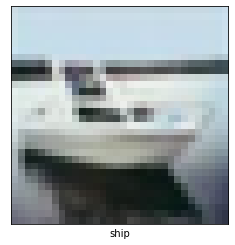

In [5]:
show_img(X_train, y_train, class_names, 192)

### Data Shape and Model

Our data starts as images that are 32 x 32 x 3 - 32 pixels by 32 pixels by color depth of 3 (RGB).

#### Flatten

One new addition we can utilize is the Flatten layer, which does exactly what is says.  The flatten layer does the same thing we did when reshaping digit images, it makes them into a flat array. We specify the shape of one example of our dataset as the input shape argument. 

### Classification - Activation and Loss

Since we are doing a classification with Keras now we need to make a few small changes to handle that. 

#### Activation

The first change is the activation on the output layer. When doing regression we want raw predictions, so there's no activation. Here we want to classify so we need to add activation. Since we are classifying into multiple classes we can use softmax to do so. We also have to set the units to the number of classes that we are predicting, in this case 10. 

Recall from when we first looked at multiclass classifications, the result of softmax is that we get a breakdown of probabilities that each record belongs to each of the classes, totalling to 1. Each class is represented by an output neuron, and the largest one wins and gets the label. 

#### Loss

We also want to use different loss metrics when doing classifications. Here we will use categorical cross entropy. 

We will need to use to_categorical here to make our current labels (e.g. [4]) into a one-hot categorical array (e.g. [0,0,0,0,1,0,0,0,0,0]). 

In [6]:
y_test = np_utils.to_categorical(y_test)
y_train = np_utils.to_categorical(y_train)

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(32, 32, 3)))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 256)               786688    
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 789,258
Trainable params: 789,258
Non-trainable params: 0
_________________________________________________________________


Epoch 1/100
350/350 [==============================] - 3s 8ms/step - loss: 1.9737 - accuracy: 0.3067 - val_loss: 1.8529 - val_accuracy: 0.3505
Epoch 2/100
350/350 [==============================] - 3s 8ms/step - loss: 1.7790 - accuracy: 0.3710 - val_loss: 1.7543 - val_accuracy: 0.3749
Epoch 3/100
350/350 [==============================] - 3s 9ms/step - loss: 1.7061 - accuracy: 0.3965 - val_loss: 1.7115 - val_accuracy: 0.3969
Epoch 4/100
350/350 [==============================] - 3s 8ms/step - loss: 1.6557 - accuracy: 0.4118 - val_loss: 1.6862 - val_accuracy: 0.3996
Epoch 5/100
350/350 [==============================] - 3s 8ms/step - loss: 1.6177 - accuracy: 0.4266 - val_loss: 1.6442 - val_accuracy: 0.4185
Epoch 6/100
350/350 [==============================] - 3s 7ms/step - loss: 1.5852 - accuracy: 0.4355 - val_loss: 1.6543 - val_accuracy: 0.4029
Epoch 7/100
350/350 [==============================] - 2s 7ms/step - loss: 1.5619 - accuracy: 0.4460 - val_loss: 1.6107 - val_accuracy: 0.4323

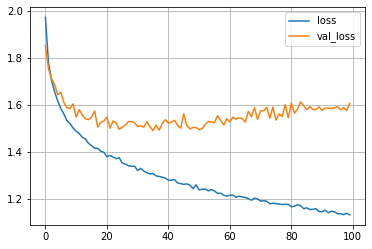

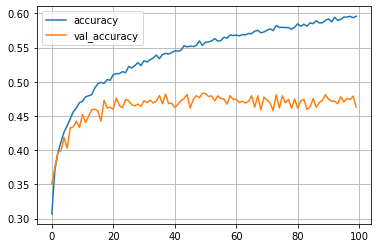

In [8]:
callback = EarlyStopping(monitor='loss', patience=50, restore_best_weights=True) 

model.compile(loss="categorical_crossentropy", optimizer="Adam", metrics=["accuracy"])
train_log = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_split=.3, verbose=1, callbacks=[callback])
model.evaluate(X_test, y_test, verbose=2)
plot_loss(train_log)
plot_acc(train_log)

Our simple model likely didn't do all that well.

We can likely do better in making predictions! If we were simpletons we'd probably look for ways to cut back that obvious overfitting. We are super sophisticated though, so we'll get all crazy and try a totally different approach...

# CNNs - Convolutional Neural Networks

To deal with images a little bit better we can use a different kind of neural network design - a CNN, or convolutional neural network. 

In short, a CNN is able to look at an image "as it is" caputuring spatial relationships that processing an image as a flattened array do not. When using a CNN we can first process the image in its original dimensions in the initial layers of the network, then flatten it down to go through a more familiar set of layers for the final prediction. 

A CNN looks at an image bit by bit, looking at a small square, then sliding over a few pixels, looking at another square, and so on. This has the effect of being able to extract features from areas of an image - as an example, think of an image of a bike, a CNN would be able to identify the distinct shape of a seat or handle bars as the image passes through the layers. 

### CNN Structure

A CNN has some new types of layers:
<ul>
<li> Convolutional layer - the convolutional layer looks at a small frame of the image at a time.
<li> Pooling layer - the pooling layer reduced the dimensionality of the data. 
<li> Regular neural network - after the convolutional parts to their work, we can flatten the data and pass it to a regular fully connected network at the final layers. 
</ul>

### Convolutional Layer

The convolutional layer is easiest to think of as a microscope that scrolls over an image looking at one small square of it at a time. This image is the most illustrative annimation I found of showing the convolution process; note that this one shows a stride of 2, which is why the filter seems to jump and is why the size of the output is so much smaller. We will normally rely on the pooling layer to reduce size, and use a stride of 1 with same padding to keep our outputs the same size as the inputs.  

![Kernel](images/cnn_kernel.gif "Kernel" )


This convolution operation translates the input "feature map" into an "output map". After the transformation the result is that each layer captures some features in the image - edges, orientation, etc... and map those down to lower layers. 

#### Filters (a.k.a kernel) in the Convolutional Layer

One of the arguemnts we provide when making a convolutional layer is the number of filters. We have a whole bunch of filters, each learns to find some different characteristic from the image data as the training progreses. 

Another argument is the size of the filter. In general, filter sizes are small squares such as 3 by 3 or 5 by 5.  

### Padding

Padding is a setting that determines if the dimensionality of the data is reduced in the convolutional layer or not. We have two choices:

<ul>
<li> Valid padding - dimensions are reduced. 
<li> Same padding - dimensions are maintained. 
</ul>

This is probably most easily illustrated by looking at the image above. That image is showing same padding - those 0s around the border are inserted to ensure that the kernel can start at the edge and still capture the entire picture. If this were valid padding the kernel would start at the real edge, and those edge values would never make it to the middle of the image. The resulting values will then be of a smaller dimension than the original. Using same padding allows the model to better capture the information around the border, avoiding what is known as the border effect. 

In general we should expect fractionally better performance with padding enabled, at the cost of some processing time and memory. This effect isn't usually massive, as with most pictures the valuable stuff is in the middle - so the impact depends on the dataset. 

#### Strides

The stride value is how many pixels the kernel window shifts each time it looks at a window. Strides of 1 move 1 pixel at a time, larger strides "skip" some pixels. Our stride will usually just be 1. 

### Pooling Layer

The pooling layer reduces the dimensionality of the data down. In image terms that you may have heard elsewhere we are downsampling - taking something that is at some higher resolution and transforming it to a lower resolution. 

This pooling step reduces the size of the data, making for more efficient calculations. It also helps generalize the ability of the model to recognize certain features. We can capture this generalization by thinking of an example - higher vs lower definition images. If we have a high definition image of something it is extremely clear, and if we have similar objects it is easy to tell them apart. For example if there are multiple cars in an image, we can probably tell them apart pretty easily - the details show the differences. If the cars are in the the background of an image (if they are in the background we are only getting a low definition version of those cars) it is harder to tell them apart - the details are different, but the general "characteristic", the fact it is a car, is consistent. Our pooling has the same impact - the pooling changes the higher definition images to lower ones, and we are better able to identify those general characteristics - making it easier to spot things that are "the same" in other images. 

The default pooling window is 2x2, so 4 features are collapsed into one. 

#### Max and Average Pooling

There are two common pooling strategies - max and average. Max takes the maximum value in the pooling window as the output, average takes the average. Max is more common, it tends to do a better job at finding contrast - differences between light and dark, which is helpful in doing things like separating foreground and background. Average tends to capture a more broad set of information on the entire image, with less focus on areas of distinct difference. 

![Max_Average_Pooling](images/max_avg_pool.png "Max_Average_Pooling" )

### Normal Neural Network Layers

Once the above work is done, potentially with several layers of layers, the final layers in the network are a normal neural network. The CNN parts act to extract features from the image, the final layers take those features and produce a prediction, just as we are used to. 

### Overal Structure

After the entire model is constructed we end up with something like this. The image is translated into a series of representations - one per layer, through the convolutional process. The pooling then lowers the dimensions of those representation, and the process (potentially repeats). At the end of all the convolutional steps we feed our final represenations into the dense stages - these features are in the "shape" of an image - with the details being totally different - each layer is a filter (rather than a color) and the dimensions of the "image" are determined by the amount of pooling and padding. This is all flattened and the dense part goes on as we are used to in making predictions. 

![CNN Structure](images/cnn_structure.jpg "CNN Structure" )


#### Simple CNN

We can build a simple CNN to make some predictions on our images. In our network we'll have:
<ul>
<li> Convolutional portion:
    <ul>
    <li> Convolutional layer - 32 filters, relu activation, same padding. 
    <li> Pooling layer - (2, 2) size. Results in data 1/4 of original size.
    <li> Above repeated 3 times. 
    </ul>
<li> Dense portion:
    <ul>
    <li> Flattening of the convolutional results. 
    <li> Dense layer. 
    <li> Output layer, 10 classes, softmax prediction. 
    </ul>
</ul>

In [9]:
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 64)        1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 64)        

#### Create a Set of Metrics

In [10]:
callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True) 
acc = keras.metrics.CategoricalAccuracy(name="accuracy")
pre = keras.metrics.Precision(name="precision")
rec = keras.metrics.Recall(name="recall")
metric_list = [acc, pre, rec]

Epoch 1/20
7/7 [==============================] - 38s 5s/step - loss: 2.2579 - accuracy: 0.1837 - precision: 0.0000e+00 - recall: 0.0000e+00 - val_loss: 2.1486 - val_accuracy: 0.2494 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
7/7 [==============================] - 36s 5s/step - loss: 2.0970 - accuracy: 0.2547 - precision: 0.5317 - recall: 0.0043 - val_loss: 2.0692 - val_accuracy: 0.2666 - val_precision: 0.8000 - val_recall: 5.3333e-04
Epoch 3/20
7/7 [==============================] - 32s 5s/step - loss: 2.0080 - accuracy: 0.2916 - precision: 0.6347 - recall: 0.0089 - val_loss: 1.9459 - val_accuracy: 0.3124 - val_precision: 0.6793 - val_recall: 0.0083
Epoch 4/20
7/7 [==============================] - 32s 5s/step - loss: 1.9094 - accuracy: 0.3266 - precision: 0.6734 - recall: 0.0191 - val_loss: 1.8688 - val_accuracy: 0.3346 - val_precision: 0.6030 - val_recall: 0.0406
Epoch 5/20
7/7 [==============================] - 32s 5s/step - loss: 1.8320 - accuracy: 0.3488 - pr

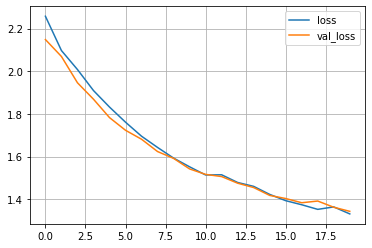

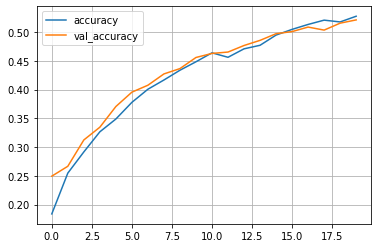

In [11]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=metric_list)
train_log = model.fit(X_train, y_train, epochs=20, batch_size=5000, validation_split=.3, verbose=1, callbacks=[callback])
train_eval = model.evaluate(X_train, y_train)
test_eval = model.evaluate(X_test, y_test, verbose=2)
plot_loss(train_log)
plot_acc(train_log)

#### By Request - Combining Metrics and Labels

There might be a more efficient way to do this, metric._name seems like it should return the name of the metric without bothering with the inspection part. It didn't work for me, so I did it this way. I may have had a mistake that I didn't troubelshoot - reader challenge to make it better!

In [12]:
#Compile Results
import inspect
metric_list_fin =[]
for met in metric_list:
    atts = inspect.getmembers(met)
    tmp_name = [a for a in atts if(a[0] == "_name")]
    metric_list_fin.append(tmp_name[0][1])

metric_list_fin.insert(0,"loss")
metric_df = pd.DataFrame(
    {'Metrics': metric_list_fin,
     'Train': train_eval,
     'Test': test_eval
    })
metric_df.head()

C:\Users\allyr\anaconda3\lib\inspect.py:350: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  value = getattr(object, key)


,Metrics,Train,Test
0,loss,1.325858,1.325777
1,accuracy,0.528240,0.525600
2,precision,0.733049,0.716428
3,recall,0.309200,0.305700


### CNNs - Convolutional Layers, Padding, Kernel Size

We can change the main options for our CNN without much difficulty. 

#### Padding

The default padding is valid, we set ours to same up above. With padding set to same our models should do a better job of capturing information around the edges of the image. We can see what the results are when we revert it to valid. 

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 64)        1792      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 15, 15, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_2 (Flatten)         (None, 1024)             

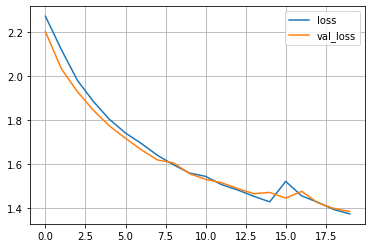

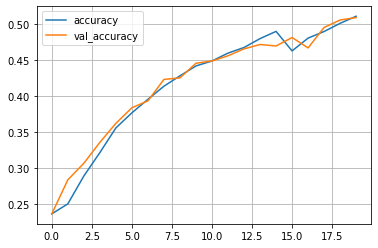

In [13]:
# Padding
model = Sequential()
model.add(Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True) 

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=metric_list)
train_log = model.fit(X_train, y_train, epochs=20, batch_size=5000, validation_split=.3, verbose=1, callbacks=[callback])
train_eval = model.evaluate(X_train, y_train)
test_eval = model.evaluate(X_test, y_test, verbose=2)
plot_loss(train_log)
plot_acc(train_log)

#### Kernel Size

We can also modify the kernel size. The kernel size is the size of the "window" - or how many pixels the filter looks at each time. 3x3 and 5x5 are probably the most common, for larger images sometimes something larger is used. 

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 64)        4864      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 16, 16, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 16, 16, 64)        102464    
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 8, 8, 64)          102464    
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 4, 4, 64)        

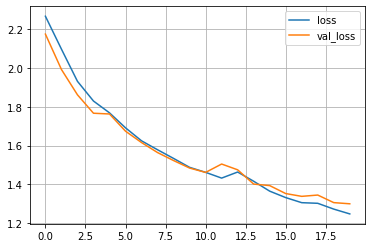

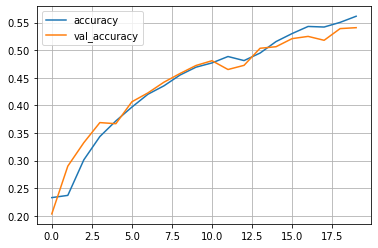

In [14]:
# Kernel Size
model = Sequential()
model.add(Conv2D(64, (5,5), activation='relu', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5,5), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (5,5), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True) 

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=metric_list)
train_log = model.fit(X_train, y_train, epochs=20, batch_size=5000, validation_split=.3, verbose=1, callbacks=[callback])
train_eval = model.evaluate(X_train, y_train)
test_eval = model.evaluate(X_test, y_test, verbose=2)
plot_loss(train_log)
plot_acc(train_log)

#### Layers 

Just like with a regular neural network we can change the number of layers. In order to allow for many layers to exist despite the pooling, we will need to increase the number of filters. 

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 32, 32, 128)       3584      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 128)      0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 16, 16, 128)       147584    
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_11 (Conv2D)          (None, 8, 8, 128)         147584    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 4, 4, 128)       

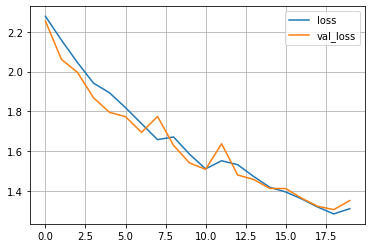

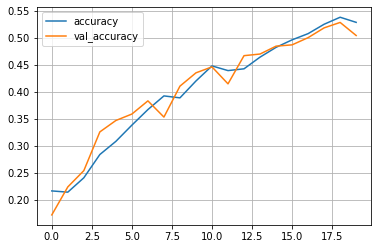

In [15]:
# Layers
model = Sequential()
model.add(Conv2D(128, (3, 3), activation='relu', input_shape=(32, 32, 3), padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding="same"))
model.add(MaxPooling2D((2, 2)))


model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True) 

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=metric_list)
train_log = model.fit(X_train, y_train, epochs=20, batch_size=5000, validation_split=.3, verbose=1, callbacks=[callback])
train_eval = model.evaluate(X_train, y_train)
test_eval = model.evaluate(X_test, y_test, verbose=2)
plot_loss(train_log)
plot_acc(train_log)

#### Batch Normalization

It is also relatively common to try batch normalization - or normalization layers applied between layers of a network. Batch normalization tends to have two main impacts - increase in model stability and acceleration of convergance. The reason for this is because each time data is transformed the inputs to the next layer can have their distribution shifted - something called internal covariate shift. Batch normalization adjusts this by renormalizing in the middle of each step. Note also that here we separate the dense layer and the activation - as we did with the from-scratch version. Batch normalization also can allow for faster learning rates in many cases - the improved convergance lets the algorithm go faster. 

Batch normalization is relatively new, put forth in around 2015, and the exact nature of how it improves things mathmatically is still debated (which surprised me). 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 32, 32, 64)        1792      
                                                                 
 batch_normalization (BatchN  (None, 32, 32, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 32, 32, 64)        0         
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 16, 16, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 16, 16, 64)        36928     
                                                                 
 activation_1 (Activation)   (None, 16, 16, 64)       

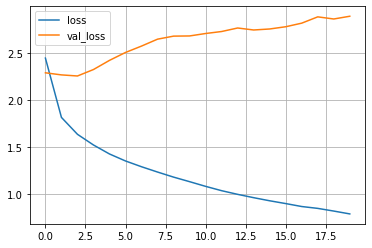

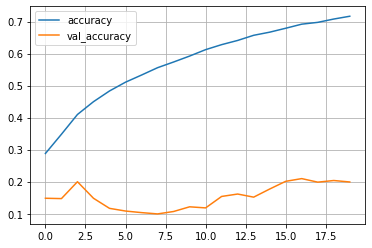

In [16]:
# Padding
model = Sequential()
model.add(Conv2D(64, (3, 3), input_shape=(32, 32, 3), padding="same"))
model.add(BatchNormalization())
model.add(Activation("relu"))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(MaxPooling2D((2, 2)))

model.add(Dropout(.2))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

callback = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True) 

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=metric_list)
train_log = model.fit(X_train, y_train, epochs=20, batch_size=5000, validation_split=.3, verbose=1, callbacks=[callback])
train_eval = model.evaluate(X_train, y_train)
test_eval = model.evaluate(X_test, y_test, verbose=2)
plot_loss(train_log)
plot_acc(train_log)

## Directories of Images

We are going to grab some data, but this time it is not getting loaded into some data structure in our application, the file is being saved to disk and uncompressed. The end result of the code below is the same as if you were to download a file and unzip it (or in this case, un-tarball it). 

In [17]:
import pathlib
import PIL 

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

##### Check Download by Printing One Image

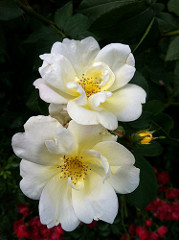

In [18]:
roses = list(data_dir.glob('roses/*'))
PIL.Image.open(str(roses[0]))

### Datasets

When dealing with things like images we commonly have actual images, not arrays or dataframes. Keras has a preprocessing function to take a folder of images and automatically create a dataset from it. 

A dataset is a built in datatype in tensorflow, it is kind of a specialized type of data structure that is meant to store larger volumes of generally non-tabular data, and is purpose made to be put through tensorflow networks. Here we will basically have the image files on disk be automatically loaded and split into two datasets - training and validation. When fitting the model we can use this dataset just as we would an array. 

This type of setup is fairly common when dealing with images. The particular function we used here - image_dataset_from_directory - does bulk data loading from the file structure on disk, handling all of the I/O details on its own. 

#### Dataset Components

The dataset is basically the data itself, along with some extra information on how it is to be used. For example, the data and targets are both in the dataset, the validation split is preset, as is the batch size. 

In [19]:
#Flowers
batch_size = 32
img_height = 180
img_width = 180

train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

class_names = train_ds.class_names
print(class_names)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.
['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


##### Build a Model with the Datasets

For the most part, things don't change significantly when using the datasets. We get to drop the arguments that are embedded in the dataset itself. 

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 41, 41, 32)        9248      
                                                                 
 flatten_6 (Flatten)         (None, 53792)            

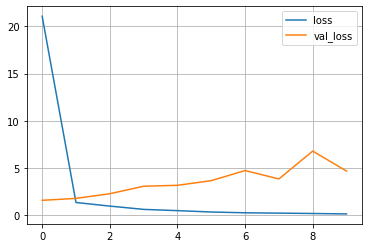

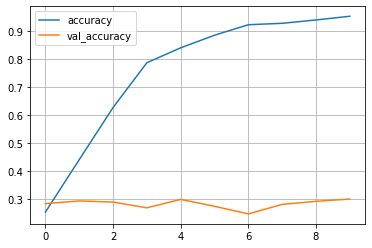

In [20]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5))
model.summary()

callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True) 
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=keras.metrics.SparseCategoricalAccuracy(name="accuracy"))
train_log = model.fit(train_ds, epochs=10, verbose=1, callbacks=[callback], validation_data=val_ds)
train_eval = model.evaluate(train_ds)
plot_loss(train_log)
plot_acc(train_log)

## Data Augmentation

When using images we can employ data augmentation to increase the size of our dataset, allowing for better training and resulting in better models. More data is king when it comes to model quality, so this is very helpful. 

The reason data augmentation is common and easy with images, where it isn't as straightforward with structured data is due to the nature of an image and what we are generally trying to do with it. Image problems are generally things like recognition - identifying what is in an image. If we are looking to identify if there is a cat in an image we probably don't  care if the cat is on the left side, the right side, rotated in any direction, tilted, etc... cats move in stupid and random ways, all we care about is if the cat is somewhere in there. 

![Augmented Cat](images/cat_aug.png "Augmented Cat" )

We can take advantage of this by doing all of those transformations to our images and using those transformed copies to augment our dataset! All of the mirrored, rotated, shifted, etc... images are just as good for the purposes of detecting a cat in an image, so we can use them. Free data!

In practice this is common and keras makes it quite easy. We can create a mini-network and apply some transformations, then just stick this into the top of our model. Augmentation, when it makes sense like this, has few to no downsides. We can expect a more generalizable model as if our goal is to spot cats, being able to spot them on the left, or on the right, or shifted, or rotated is an actual thing that we directly want our model to be able to do. 

In [21]:
# Augmentation
augment = keras.Sequential([])
augment.add(RandomFlip("horizontal", input_shape=(img_height, img_width,3)))
augment.add(RandomRotation(0.1))
augment.add(RandomZoom(0.1))

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_7 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 conv2d_20 (Conv2D)          (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_18 (MaxPoolin  (None, 89, 89, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 87, 87, 32)        9248      
                                                                 
 max_pooling2d_19 (MaxPoolin  (None, 43, 43, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 41, 41, 32)       

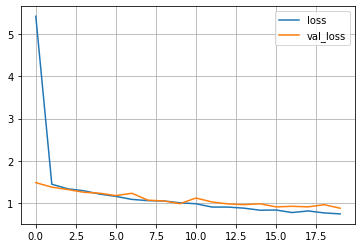

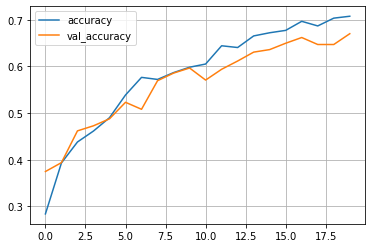

In [22]:
model = Sequential()
model.add(augment)
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(180, 180, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(5))
model.summary()

callback = EarlyStopping(monitor='loss', patience=10, restore_best_weights=True) 

model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), optimizer="adam", metrics=keras.metrics.SparseCategoricalAccuracy(name="accuracy"))
train_log = model.fit(train_ds, epochs=20, verbose=1, callbacks=[callback], validation_data=val_ds)
plot_loss(train_log)
plot_acc(train_log)

## Exercise

Use the original dataset from the first section and build a model incorporating some of the CNN features. Add data augmentation, then manipulate things such as the number of layers, kernel size, padding, dropouts, etc... to try to improve accuracy. 

In [23]:
# Create Model